# IA Notebook #3 |  Descenso del Gradiente (Gradient Descent)

Este es un notebook conducido originalmente por Carlos Santana Vega, re-escrito y comentado por Luis Arturo Cruz Cruz. Puedes consultar la fuente original en: https://www.youtube.com/watch?v=-_A_AAxqzCg&t=610s

El objetivo de este ejercicio es encontrár los puntos mínimos de una función espacial (superficie) mediante el método del descenso del grdiente.

In [1]:
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt

Lo primero que demos establecer es una función optimizar, esta ecuación no representa ningúna función de coste en especial, solo es una superficie con crestas y valles.

La función en cuestión es la siguiente:

$$F(x,y)=sin(\frac{1}{2}x^{2}-\frac{1}{4}y^{2}+3)cos(2x+1-e^{y})$$

In [2]:
func = lambda th : np.sin((0.5*(th[0]**2))-(0.25*(th[1]**2))+3)*np.cos(2*th[0] + 1 -np.e**th[1])

In [3]:
func([5,3])

-0.5956138973318122

A continuación, debemos preparar los espacios lineales para representar la superficie característica de la función.

In [4]:
res = 100
_X = np.linspace(-2,2, res)
_Y = np.linspace(-2,2, res)
_Z = np.zeros((res,res))

#A continuación generamos el espacio de la variable depemndiente Z

for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
        _Z[iy, ix] = func([x,y]) 

#Nota: Los indices estan al revés porque el orden de una matriz suele ser
#primero las filas (eje y) y luego las columnas (eje x).

In [5]:
_Z

array([[ 0.75678768,  0.69949249,  0.63520381, ...,  0.00601758,
        -0.05013846, -0.1147978 ],
       [ 0.78233319,  0.72763874,  0.66546524, ...,  0.0100609 ,
        -0.04806718, -0.11435375],
       [ 0.80611957,  0.75410427,  0.69414667, ...,  0.01456705,
        -0.04540738, -0.11319675],
       ...,
       [ 0.74539135,  0.72025173,  0.6843787 , ...,  0.27770918,
         0.24181329,  0.19526019],
       [ 0.61239218,  0.60628261,  0.5884932 , ...,  0.42781714,
         0.41611394,  0.39256434],
       [ 0.43138509,  0.44549641,  0.44762885, ...,  0.53501224,
         0.54960755,  0.55243366]])

Una vez generado el espacio característico de la función, ahora vamos a preparar las curvas de nivel

<function matplotlib.pyplot.show(*args, **kw)>

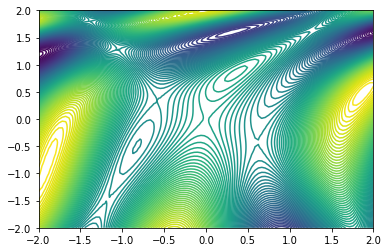

In [6]:
plt.contour(_X,_Y,_Z, 100)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

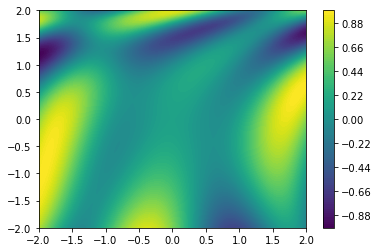

In [7]:
#en versión difusa 
plt.contourf(_X,_Y,_Z, 100)
plt.colorbar()
plt.show

Ahora vamos a posicionarnos en un punto aleatorio dentro de la superficie, y una vez hecho eso implementaremos el método del gradiente.

<function matplotlib.pyplot.show(*args, **kw)>

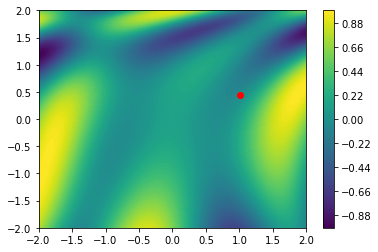

In [8]:
plt.contourf(_X,_Y,_Z, 100)
plt.colorbar()

Theta = np.random.rand(2)*4 - 2 #Theta es el punto aleatorio sobre el mapa de curvas

plt.plot(Theta[0], Theta[1], "o", c = "red")
plt.show

En la analogía del montañista sobre el terreno siniuoso, ya tenemos el terreno (la superficie característica de la función) y al montañista (punto Theta que se localiza inicialmente en coordenadas aleatorias dentro del dominio de la función).

Es ahora tiempo de escribir el algoritmo del descenso del gradiente.

In [ ]:
plt.contourf(_X,_Y,_Z, 100)
plt.colorbar()

Theta = np.random.rand(2)*4 - 2 #Theta es el punto aleatorio sobre el mapa de curvas

    #La derivada parcial se calcula mediante el método de las diferencias finitas (pequeñas)
    #Fuente: https://en.wikipedia.org/wiki/Finite_difference

#Sea h el pequeño incremento para el método de las diferencias finitas.
#h es válido tanto para x como para y.
h = 0.0001
_T = np.copy(Theta)
    
for it, th in enumerate(Theta):
    _T[it] = _T[it] + h

plt.plot(Theta[0], Theta[1], "o", c = "red")
plt.show